In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import re
from nltk.corpus import stopwords

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go

In [6]:
import plotly.express as px

In [7]:
#https://medium.com/@gabya06/python-sentiment-analysis-using-textblob-and-vader-for-glassdoor-reviews-cc9632babb73

In [8]:
path = "C:\\Users\\Tiziano Pacifico\\Desktop\\Applicativi personali\\Sentiment\\Outputs\\"
filename = "Company_DF.json"

In [9]:
data = pd.read_json(path+filename,lines=True)

In [10]:
data.head()

,name,rating,review
0,GreenTech Innovations,1.3,Extremely disappointed with their service. Pro...
1,CrispCloud Solutions,4.7,CrispCloud Solutions has consistently exceeded...
2,HappyHome Gardening,1.8,Extremely dissatisfied with the service. The p...
3,AquaPure Waters,1.2,Extremely dissatisfied with the water quality ...
4,QuickFix Plumbing,1.7,Very disappointing experience with QuickFix Pl...


In [11]:
nuovi_nomi_colonne = {
    'name': 'company',
    'rating': 'stars',
}
data = data.rename(columns=nuovi_nomi_colonne)

In [12]:
data['review len'] = data['review'].apply(lambda x: len(x))

In [13]:
data = data.sort_values(by='stars', ascending=False)

In [14]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=data['stars'],
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    ),
    opacity=0.75
))

fig.update_layout(
    title_font=dict(color='#000000'),
    xaxis_title_font=dict(color='#000000'),
    yaxis_title_font=dict(color='#000000'),
    font=dict(color='#000000'),
    title_text='<b>Distribuzione delle recensioni per valutazione', # title of plot
    title_x=0.5,
    title_xanchor='center',
    xaxis_title_text='Stars rating', # xaxis label
    yaxis_title_text='Numero recensioni', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    width = 800
)

fig.show()

In [15]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=data['review len'],
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    ),
    opacity=0.75
))

fig.update_layout(
    title_font=dict(color='#000000'),
    xaxis_title_font=dict(color='#000000'),
    yaxis_title_font=dict(color='#000000'),
    font=dict(color='#000000'),
    title_text='<b>Distribuzione delle recensioni per lunghezza', 
    title_x=0.5,
    title_xanchor='center',# title of plot
    xaxis_title_text='Lunghezza recensioni', # xaxis label
    yaxis_title_text='Numero recensioni', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    width = 800
)

fig.show()

# TEXTBLOB

In [16]:
data = data.assign(clean_review = data.review.map(lambda x: ' '.join(TextBlob(str(x)).words)))  


In [17]:
data.clean_review = data.clean_review.map(lambda x: " ".join([i.strip(" ") for i in re.sub('[0-9]','',x).split()]))
# Remove stopwords & lowercase
data.clean_review = data.clean_review.map(lambda x: " ".join([i.lower() for i in x.split() if i not in stopwords.words('english')]))

In [18]:
data = data.sort_values(by='stars', ascending = False)
data['subjectivity'] = data['review'].apply(lambda x: TextBlob(x).subjectivity)
data['polarity'] = data['review'].apply(lambda x: TextBlob(x).polarity)

In [19]:

company_stats = data.groupby('company').agg({'stars':'mean', 'polarity':'mean','subjectivity':'mean'})
company_stats.rename(columns = {'stars': 'avg_stars'}, inplace=True)
company_stats.reset_index(inplace=True)
company_stats = company_stats.sort_values(by='avg_stars', ascending = False)

In [20]:
model = LinearRegression()
X = np.array(company_stats['avg_stars'])
Y = np.array(company_stats['polarity'])
model.fit(X.reshape(-1, 1), Y)
intercetta = model.intercept_
coeff_angolare = model.coef_[0]
valori_previsti = model.predict(X.reshape(-1, 1))
# Calcolare il MSE
mse = mean_squared_error(Y, valori_previsti)
# Calcolare il RMSE
rmse = np.sqrt(mse)
# Calcolare il MAE
mae = mean_absolute_error(Y, valori_previsti)
# Calcolare l'R quadro
r2 = r2_score(Y, valori_previsti)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.06278344347293088
RMSE: 0.2505662456775271
MAE: 0.1864732701264302
R^2: 0.23035156888537223


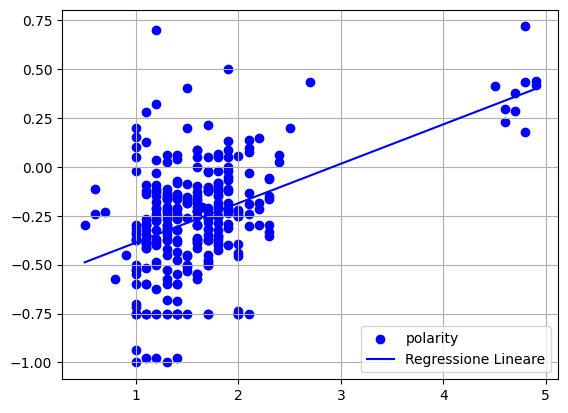

In [21]:
plt.scatter(company_stats['avg_stars'],company_stats['polarity'], label = 'polarity', color='blue', marker='o')
plt.plot(X, valori_previsti, color='blue', label='Regressione Lineare')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
data.head(20)

,company,stars,review,review len,clean_review,subjectivity,polarity
14,AstroBrew Coffee,4.9,AstroBrew Coffee has been consistently impress...,209,astrobrew coffee consistently impressing custo...,0.750000,0.418333
10,Globex Corporation,4.9,Outstanding service and innovative solutions h...,194,outstanding service innovative solutions consi...,0.656250,0.437500
40,GourmetGalaxy Restaurants,4.8,"The atmosphere at GourmetGalaxy is unmatched, ...",207,the atmosphere gourmetgalaxy unmatched delight...,0.883333,0.716667
5,BrightPath Tutoring,4.8,The services provided by BrightPath Tutoring w...,171,the services provided brightpath tutoring exce...,0.718333,0.175000
293,VistaVoyage Tours,4.8,Our experience with VistaVoyage Tours was outs...,218,our experience vistavoyage tours outstanding e...,0.625000,0.430556
67,NoveltyNest Decor,4.7,The products from NoveltyNest Decor have compl...,225,the products noveltynest decor completely tran...,0.735000,0.283750
1,CrispCloud Solutions,4.7,CrispCloud Solutions has consistently exceeded...,198,crispcloud solutions consistently exceeded exp...,0.587500,0.379167
11,NextGen Gaming,4.6,With an extensive library of innovative games ...,176,with extensive library innovative games except...,0.472222,0.294444
22,BakeMyDay Bakery,4.6,Absolutely delighted with the heavenly pastrie...,146,absolutely delighted heavenly pastries bakemyd...,0.566667,0.229167
13,PixelPerfect Design,4.5,I'm thoroughly impressed with PixelPerfect Des...,301,i 'm thoroughly impressed pixelperfect design ...,0.885000,0.415000


In [23]:
model = LinearRegression()
X = np.array(company_stats['avg_stars'])
Y = np.array(company_stats['polarity'])
model.fit(X.reshape(-1, 1), Y)
intercetta = model.intercept_
coeff_angolare = model.coef_[0]
valori_previsti = model.predict(X.reshape(-1, 1))
# Calcolare il MSE
mse = mean_squared_error(Y, valori_previsti)
# Calcolare il RMSE
rmse = np.sqrt(mse)
# Calcolare il MAE
mae = mean_absolute_error(Y, valori_previsti)
# Calcolare l'R quadro
r2 = r2_score(Y, valori_previsti)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.06278344347293088
RMSE: 0.2505662456775271
MAE: 0.1864732701264302
R^2: 0.23035156888537223


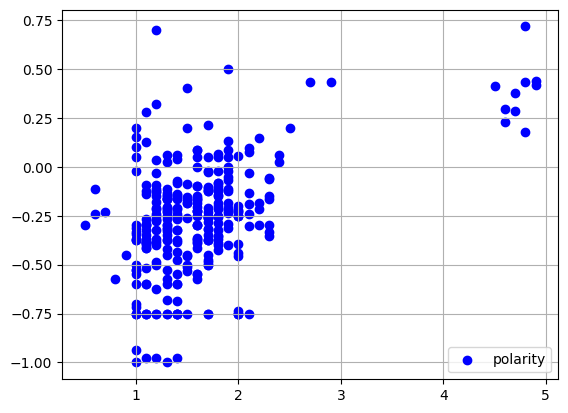

In [24]:
plt.scatter(data['stars'],data['polarity'], label = 'polarity', color='blue', marker='o')
#plt.plot(X, valori_previsti, color='blue', label='Regressione Lineare')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
fig = px.scatter(data, x="stars", y="polarity", color='polarity', marginal_x="histogram")
fig['data'][1].marker.color = 'rgba(246, 78, 139, 0.6)'  # Cambia 'desired-color' con il tuo colore preferito
fig.data[1].marker.line.color = 'rgba(246, 78, 139, 1.0)'  # Sostituisci con il colore desiderato
fig.data[1].marker.line.width = 3

# Per cambiare la label dell'asse x dell'istogramma:
fig.layout.yaxis2.title.text = 'Stars freq'
fig.show()

# VADER

In [26]:
sid_obj = SentimentIntensityAnalyzer()

In [27]:
data['vader_polarity'] = data['review'].apply(sid_obj.polarity_scores)

In [28]:
data['compund'] = data['vader_polarity'].apply(lambda x : x['compound'])

In [29]:
data['neg'] = data['vader_polarity'].apply(lambda x : x['neg'])

In [30]:
data['pos'] = data['vader_polarity'].apply(lambda x : x['pos'])

In [31]:
data.head()

,company,stars,review,review len,clean_review,subjectivity,polarity,vader_polarity,compund,neg,pos
14,AstroBrew Coffee,4.9,AstroBrew Coffee has been consistently impress...,209,astrobrew coffee consistently impressing custo...,0.750000,0.418333,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.9477,0.000,0.398
10,Globex Corporation,4.9,Outstanding service and innovative solutions h...,194,outstanding service innovative solutions consi...,0.656250,0.437500,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",0.9062,0.000,0.366
40,GourmetGalaxy Restaurants,4.8,"The atmosphere at GourmetGalaxy is unmatched, ...",207,the atmosphere gourmetgalaxy unmatched delight...,0.883333,0.716667,"{'neg': 0.037, 'neu': 0.771, 'pos': 0.191, 'co...",0.7506,0.037,0.191
5,BrightPath Tutoring,4.8,The services provided by BrightPath Tutoring w...,171,the services provided brightpath tutoring exce...,0.718333,0.175000,"{'neg': 0.055, 'neu': 0.649, 'pos': 0.296, 'co...",0.8318,0.055,0.296
293,VistaVoyage Tours,4.8,Our experience with VistaVoyage Tours was outs...,218,our experience vistavoyage tours outstanding e...,0.625000,0.430556,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.7644,0.000,0.180


In [32]:
company_stats = data.groupby('company').agg({'stars':'mean', 'polarity':'mean','subjectivity':'mean', 'compund':'mean',
                                            'pos':'mean','neg':'mean'})
company_stats.rename(columns = {'stars': 'avg_stars'}, inplace=True)
company_stats.reset_index(inplace=True)

In [33]:
company_stats.head(1)

,company,avg_stars,polarity,subjectivity,compund,pos,neg
0,AeroDynamic Drones,1.6,-0.368333,0.498333,-0.8268,0.065,0.289


In [34]:
model = LinearRegression()
X = np.array(company_stats['avg_stars'])
Y = np.array(company_stats['compund'])
model.fit(X.reshape(-1, 1), Y)
intercetta = model.intercept_
coeff_angolare = model.coef_[0]
valori_previsti = model.predict(X.reshape(-1, 1))
# Calcolare il MSE
mse = mean_squared_error(Y, valori_previsti)
# Calcolare il RMSE
rmse = np.sqrt(mse)
# Calcolare il MAE
mae = mean_absolute_error(Y, valori_previsti)
# Calcolare l'R quadro
r2 = r2_score(Y, valori_previsti)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.1917102819311037
RMSE: 0.4378473271941987
MAE: 0.35235321486639304
R^2: 0.15286270540951952


In [35]:
X = np.array(company_stats['avg_stars'])
Y_pos = np.array(company_stats['pos'])
model.fit(X.reshape(-1, 1), Y)
intercetta_pos = model.intercept_
coeff_angolare_pos = model.coef_[0]
valori_previsti_pos = model.predict(X.reshape(-1, 1))

# Calcolare il MSE
mse_pos = mean_squared_error(Y_pos, valori_previsti_pos)
# Calcolare il RMSE
rmse_pos = np.sqrt(mse_pos)
# Calcolare il MAE
mae_pos = mean_absolute_error(Y_pos, valori_previsti_pos)
# Calcolare l'R quadro
r2_pos = r2_score(Y_pos, valori_previsti_pos)

print(f'MSE: {mse_pos}')
print(f'RMSE: {rmse_pos}')
print(f'MAE: {mae_pos}')
print(f'R^2: {r2_pos}')

MSE: 0.19775763050308953
RMSE: 0.44469948336274184
MAE: 0.4261857500012207
R^2: -28.013807004242334


In [83]:
X = np.array(company_stats['avg_stars'])
Y_neg = np.array(company_stats['neg'])
model.fit(X.reshape(-1, 1), Y_neg)
intercetta_neg = model.intercept_
coeff_angolare_neg = model.coef_[0]
valori_previsti_neg = model.predict(X.reshape(-1, 1))

# Calcolare il MSE
mse_neg = mean_squared_error(Y_neg, valori_previsti_neg)
# Calcolare il RMSE
rmse_neg = np.sqrt(mse_neg)
# Calcolare il MAE
mae_neg = mean_absolute_error(Y_neg, valori_previsti_neg)
# Calcolare l'R quadro
r2_neg = r2_score(Y_neg, valori_previsti_neg)

print(f'MSE: {mse_neg}')
print(f'RMSE: {rmse_neg}')
print(f'MAE: {mae_neg}')
print(f'R^2: {r2_neg}')

MSE: 0.0064372866225494265
RMSE: 0.0802327029492926
MAE: 0.06470653328371978
R^2: 0.1536591664395177


In [36]:
company_stats.head(1)

,company,avg_stars,polarity,subjectivity,compund,pos,neg
0,AeroDynamic Drones,1.6,-0.368333,0.498333,-0.8268,0.065,0.289


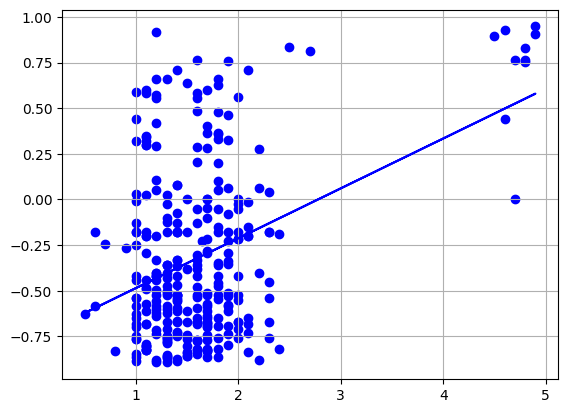

In [37]:
plt.scatter(company_stats['avg_stars'],company_stats['compund'], label = 'polarity', color='blue', marker='o')
plt.plot(X, valori_previsti, color='blue', label='Regressione Lineare')
plt.grid(True)

In [38]:

fig = px.scatter(data, x="stars", y="compund", color='compund', marginal_x="histogram")
fig['data'][1].marker.color = 'rgba(246, 78, 139, 0.6)'  # Cambia 'desired-color' con il tuo colore preferito
fig.data[1].marker.line.color = 'rgba(246, 78, 139, 1.0)'  # Sostituisci con il colore desiderato
fig.data[1].marker.line.width = 3

# Per cambiare la label dell'asse x dell'istogramma:
fig.layout.yaxis2.title.text = 'Stars freq'
fig.show()

In [39]:
data[data['compund'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 129 to 262
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         238 non-null    object 
 1   stars           238 non-null    float64
 2   review          238 non-null    object 
 3   review len      238 non-null    int64  
 4   clean_review    238 non-null    object 
 5   subjectivity    238 non-null    float64
 6   polarity        238 non-null    float64
 7   vader_polarity  238 non-null    object 
 8   compund         238 non-null    float64
 9   neg             238 non-null    float64
 10  pos             238 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 22.3+ KB


In [40]:
data[data['polarity'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 230 to 262
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         264 non-null    object 
 1   stars           264 non-null    float64
 2   review          264 non-null    object 
 3   review len      264 non-null    int64  
 4   clean_review    264 non-null    object 
 5   subjectivity    264 non-null    float64
 6   polarity        264 non-null    float64
 7   vader_polarity  264 non-null    object 
 8   compund         264 non-null    float64
 9   neg             264 non-null    float64
 10  pos             264 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 24.8+ KB


In [47]:
data['stars_normalized'] = ((data['stars']/5)*2-1)

In [48]:
data['compound stars ratio'] =  abs(data['compund'] - data['stars_normalized'])

In [49]:
data['compound stars ratio'].sum()/len(data)

0.35159003215434087

In [50]:
data['polarity stars ratio'] =  abs(data['polarity'] - data['stars_normalized'])

In [51]:
data['polarity stars ratio'].sum()/len(data)

0.23417526817463655